<h1>Лабораторная работа №7
Работа с текстовыми данными.</h1>

<h2>Создайте свой «мешок слов», например, набор из 20-25 отзывов о чем-либо, напишите краткое пояснение к данным.</h2>

In [31]:
import os
os.listdir('lab7')

['test', 'train']

In [32]:
from sklearn.datasets import load_files
reviews_train = load_files('lab7/train/')
text_train, y_train = reviews_train.data, reviews_train.target

In [33]:
print("type of text_train: {}".format(type(text_train)))
print("length of text_train: {}".format(len(text_train)))
print("text_train[1]:\n{}".format(text_train[1]))

type of text_train: <class 'list'>
length of text_train: 12
text_train[1]:
b"MIT is synonymous with excellence, where academic rigor meets a forward-thinking mindset. The comprehensive curriculum ensures that students not only grasp the fundamentals but also delve into the frontiers of knowledge. The commitment to diversity and inclusion enriches the educational experience, exposing students to a variety of perspectives. The collaborative projects and research opportunities make learning a dynamic and engaging process. MIT isn't just an institution; it's a community that nurtures the next generation of leaders and innovators, equipping them with the skills to address global challenges."


In [34]:
text_train = [doc.replace(b"<br />", b" ") for doc in text_train]

In [35]:
print("text_train[1]:\n{}".format(text_train[1]))

text_train[1]:
b"MIT is synonymous with excellence, where academic rigor meets a forward-thinking mindset. The comprehensive curriculum ensures that students not only grasp the fundamentals but also delve into the frontiers of knowledge. The commitment to diversity and inclusion enriches the educational experience, exposing students to a variety of perspectives. The collaborative projects and research opportunities make learning a dynamic and engaging process. MIT isn't just an institution; it's a community that nurtures the next generation of leaders and innovators, equipping them with the skills to address global challenges."


In [36]:
import numpy as np
np.unique(y_train)

array([0, 1])

In [37]:
print("Количество примеров на класс (обучение - training: {}".format(np.bincount(y_train)))

Количество примеров на класс (обучение - training: [6 6]


In [38]:
reviews_train = load_files('lab7/test/')
text_test, y_test =reviews_train.data, reviews_train.target
print("Количество документов в текстовых данных: {}".format(len(text_test)))

Количество документов в текстовых данных: 12


In [39]:
print("Количество примеров на класс (тест - test): {}".format(np.bincount(y_test)))

Количество примеров на класс (тест - test): [6 6]


In [40]:
text_test = [doc.replace(b"<br />", b" ") for doc in text_test]

In [41]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer().fit(text_train)
X_train = vect.transform(text_train)

In [42]:
print("X_train:\n {}".format(repr(X_train)))

X_train:
 <12x438 sparse matrix of type '<class 'numpy.int64'>'
	with 794 stored elements in Compressed Sparse Row format>


In [43]:
vect

CountVectorizer()

In [45]:
feature_names = vect.get_feature_names_out()
print("Количество признаков: {}".format(len(feature_names)))
print("Первые 20 признаков: \n {}".format(feature_names[:20]))

Количество признаков: 438
Первые 20 признаков: 
 ['ability' 'about' 'academia' 'academic' 'accessibility' 'accessing'
 'achievable' 'achievement' 'acquiring' 'address' 'adept' 'advancements'
 'align' 'all' 'also' 'alumni' 'among' 'an' 'and' 'anxiety']


In [46]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [47]:
scores = cross_val_score(LogisticRegression(), X_train, y_train, cv=5)
print("Mean value of cross_val_score: {:.2f}".format(np.mean(scores)))

Mean value of cross_val_score: 0.90


In [48]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(max_iter=100), param_grid, cv=5)
grid.fit(X_train, y_train)
print("The best cross_val: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

The best cross_val: 0.90
Best parameters:  {'C': 0.1}


In [49]:
X_test = vect.transform(text_test)

In [50]:
print("The best score on test set: {:.2f}".format(grid.score(X_test, y_test)))

The best score on test set: 1.00


<h2>Создайте словарь стоп-слов, примените стоп-слова к своему «мешку слов»</h2>|

In [51]:
stop_words = ["a","an","and","the", "is","it","for","of","with","in","on","at","to","from",
"by","that","this","but","not","no","can","be","has","are"]

In [52]:
print("Количество стоп-слов: {}".format(len(stop_words)))

Количество стоп-слов: 24


In [53]:
vect = CountVectorizer(stop_words='english').fit(text_train)
X_train = vect.transform(text_train)
print("X_train with stop-words: \n {}".format(repr(X_train)))

X_train with stop-words: 
 <12x375 sparse matrix of type '<class 'numpy.int64'>'
	with 588 stored elements in Compressed Sparse Row format>


In [54]:
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("The best cross_val: {:.2f}".format(grid.best_score_))

The best cross_val: 0.93


<h2>Масштабируйте данные с помощью tf-idf</h2>

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline

In [56]:
pipe = make_pipeline(TfidfVectorizer(min_df=5, norm=None), LogisticRegression(max_iter=100)) 
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_train, y_train)
print("Haилучшее значение перекрестной проверки: {:.2f}".format(grid.best_score_))

Haилучшее значение перекрестной проверки: 0.90


In [57]:
vectorizer = grid.best_estimator_.named_steps["tfidfvectorizer"] 

X_train = vectorizer.transform(text_train)

max_value = X_train.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()

In [58]:
print("Признаки с наименьшими значениями fidf:\n{}".format(feature_names [sorted_by_tfidf[:20]]))
print("Признаки с наибольшими значениями tfdf: \n{}".format(feature_names [sorted_by_tfidf[-20:]]))

Признаки с наименьшими значениями fidf:
['are' 'alumni' 'accessing' 'academic' 'all' 'academia' 'anxiety' 'also'
 'architects' 'ability' 'advancements' 'applicable' 'align'
 'accessibility' 'achievable' 'archaic' 'achievement' 'an' 'apart'
 'applications']
Признаки с наибольшими значениями tfdf: 
['architects' 'ability' 'advancements' 'applicable' 'align'
 'accessibility' 'achievable' 'archaic' 'achievement' 'an' 'apart'
 'applications' 'acquiring' 'among' 'about' 'address' 'approach' 'and'
 'adept' 'applying']


In [62]:
sorted_by_idf = np.argsort(vectorizer.idf_)
print("Признаки с наименьшими значениями idƒ:\n{}".format(feature_names[sorted_by_idf[:100]]))

Признаки с наименьшими значениями idƒ:
['about' 'applying' 'applicable' 'and' 'among' 'approach' 'anxiety'
 'acquiring' 'ability' 'address' 'adept' 'also' 'architects' 'are'
 'advancements' 'alumni' 'achievable' 'accessing' 'accessibility'
 'academic' 'archaic' 'align' 'achievement' 'an' 'apart' 'applications'
 'academia' 'all']


In [85]:
import matplotlib.pyplot as plt

# Получите коэффициенты модели
coefficients = grid.best_estimator_.named_steps["logisticregression"].coef_

# Выведите первые 20 коэффициентов
top_coefficients = np.argsort(coefficients.ravel())[-20:]
bottom_coefficients = np.argsort(coefficients.ravel())[:20]

feature_names = np.array(vectorizer.get_feature_names_out())

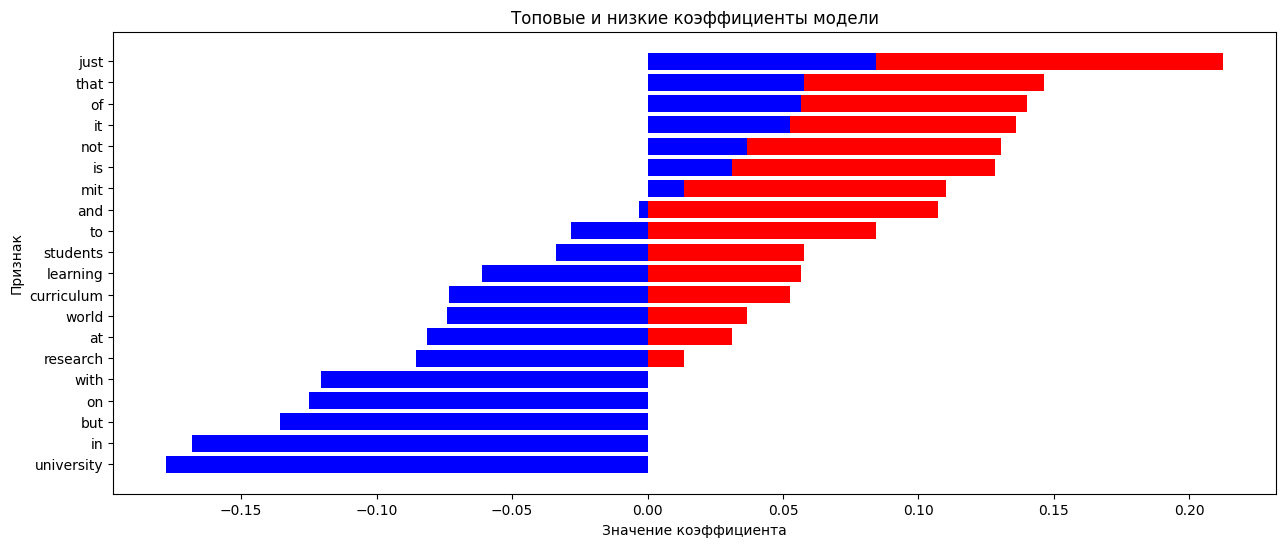

In [86]:
# Визуализация топовых и низких коэффициентов
plt.figure(figsize=(15, 6))
plt.barh(range(len(top_coefficients)), coefficients.ravel()[top_coefficients], color='red')
plt.barh(range(len(bottom_coefficients)), coefficients.ravel()[bottom_coefficients], color='blue')
plt.yticks(range(len(top_coefficients)), feature_names[top_coefficients])
plt.xlabel("Значение коэффициента")
plt.ylabel("Признак")
plt.title("Топовые и низкие коэффициенты модели")
plt.show()

In [79]:
coefficients = grid.best_estimator_.named_steps["logisticregression"].coef_
print("Размерности коэффициентов модели: {}".format(coefficients.shape))
print("Коеффициенты: {}".format(coefficients.ravel()[:]))

Размерности коэффициентов модели: (1, 28)
Коеффициенты: [-0.08539094  0.10722853  0.03102434 -0.13572459 -0.03381092  0.05257491
 -0.07390303 -0.08145997 -0.12512892 -0.06100258  0.12815956  0.13585561
  0.2123802  -0.1680221   0.05650089 -0.17769533  0.11005649  0.13043917
  0.13997945 -0.028138    0.01343013  0.05777847  0.14641992 -0.12037989
  0.0844305  -0.073345   -0.00325342  0.03683655]


In [88]:
pipe = make_pipeline(TfidfVectorizer(), LogisticRegression()) 

param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100],
            'tfidfvectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)]}

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_)) 
print("Best parameters: \n{}".format(grid.best_params_))

Best cross-validation score: 1.00
Best parameters: 
{'logisticregression__C': 10, 'tfidfvectorizer__ngram_range': (1, 2)}


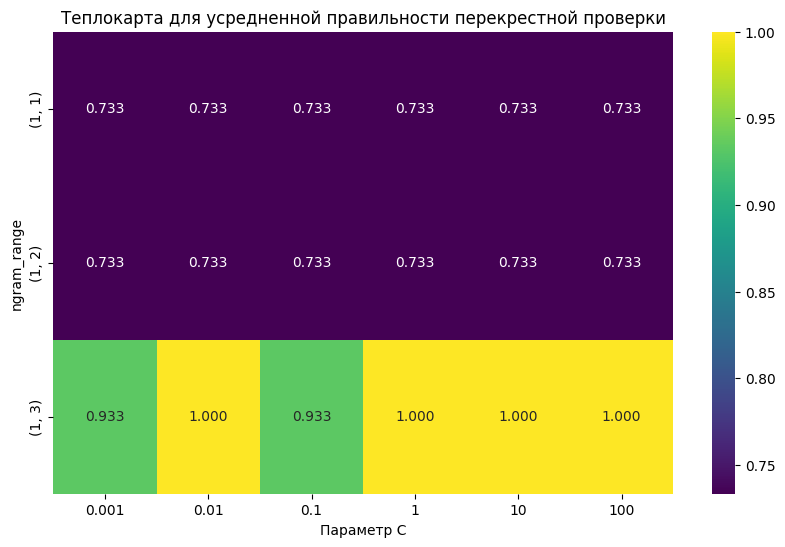

In [94]:
import seaborn as sns

grid_mean_scores = np.array(grid.cv_results_['mean_test_score']).reshape(3, 6)

plt.figure(figsize=(10, 6))
sns.heatmap(grid_mean_scores, annot=True, fmt=".3f", xticklabels=param_grid['logisticregression__C'],
            yticklabels=[str(i) for i in param_grid['tfidfvectorizer__ngram_range']], cmap="viridis")
plt.xlabel('Параметр C')
plt.ylabel('ngram_range')
plt.title('Теплокарта для усредненной правильности перекрестной проверки')
plt.show()

<h2>Вывод по лабораторной работе №7. Работа с текстовыми данными</h2>

В начале работы создала "мешок-слов" из набора негативных и позитивных отзывов об университете MIT. Для этого использовалась библиотека sklearn.datasets для загрузки отзывов, а затем была применена векторизация текста с использованием CountVectorizer. Этот шаг помог представить текст в виде матрицы, где каждый столбец соответствует уникальному слову, а каждая строка - документу.

На полученных данных была применена логистическая регрессия c результатом 90%. Проведен анализ качества модели с использованием кросс-валидации. Далее был проведен поиск оптимальных параметров с использованием GridSearchCV, что позволило улучшить точность предсказаний.

Для улучшения модели был создан словарь стоп-слов, и они были применены к данным. Стоп-слова позволили избавиться от неинформативных слов. С помощью этого метода получилось улучшить модель на 3%(с 90 до 93).

Для учета важности слов в документе была применена техника масштабирования данных с использованием tf-idf (term frequency-inverse document frequency). Это помогло учесть не только частоту слова в документе, но и его важность в контексте всего корпуса текстов. Были выявлены признаки с наименьшими и наибольшими значениями.

Лабораторная работа позволила ознакомиться с основными этапами работы с текстовыми данными, включая их предобработку, векторизацию, построение модели и оценку ее качества. Эксперименты с параметрами модели и применение различных техник обработки текста позволяют улучшить результаты и сделать модель более эффективной.